In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Naive Bayes
MultinomialNB y GaussianNB pertenecen a la familia de clasificadores de Naive Bayes (grupo de algoritmos probabilísticos basados en el teorema de Bayes).

Naive Bayes calcula la probabilidad de que una muestra pertenezca a una clase, suponiendo que todas las características son independientes entre sí (por eso se llama *naive*).

El teorema de Bayes dice:

$$
P(C|X) = \frac{P(X|C) \cdot P(C)}{P(X)}
$$

- C = clase (spam o no)
- X = conjunto de características 
- P(C|X) = probabilidad de que sea clase C dado X
- P(X|C) = probabilidad de ver esas características si la clase es C
- P(C) = probabilidad previa de la clase
- P(X) = probabilidad total de ver X

## GaussianNB
Sigue la distribución Normal. En teoría es mejor para datos continuos (altura, peso, edad, etc.).

Cada clase tiene una media y desviación estándar por característica. Funciona bien aunque las características no sean totalmente independientes. Se usa en reconocimiento facial, diagnóstico médico y demás.

## MultinomialNB 
Sigue una distribución Multinomial para valores discretos no negativos (conteo de palabras, por ejemplo). La distribución multinomial es usada cuando contamos cuántas veces ocurre algo. Muy común en clasificación de texto, análisis de sentimientos, etc. Funciona bien incluso con muchas características dispersas* (sparse data).

## BernoulliNB 
Sigue una distribución de Bernoulli (0 o 1) para valores binarios (casos de éxito o fracaso).

*Sparse data: Datos donde la mayoría de los valores son ceros o vacíos, y solo unos pocos tienen valores distintos de cero. En contraste, dense data significa que casi todas las posiciones tienen valores distintos de cero, como ocurre con imágenes o sensores continuos.

### Reporte de clasificación

Se calcula la matriz de confusión y:

- Precisión: mide cuántas de las predicciones positivas fueron realmente correctas. Si el modelo predice “1” en 100 casos y 88 son correctos, la precisión = 0.88. Sirve para saber qué tan confiables son las predicciones positivas, importante cuando los falsos positivos son costosos.

- Recall: mide cuántos de los casos realmente positivos fueron detectados. Si hay 100 verdaderos positivos en total y el modelo detecta 95, recall = 0.95. Sirve para saber qué tanto el modelo deja escapar casos positivos, importante cuando los falsos negativos son graves (como fraudes).

- F1-score: es la media armónica entre precisión y recall. Mide el rendimiento global cuando hay clases desbalanceadas.

- Support: número real de muestras de cada clase en el conjunto de pruebas. 

- Accuracy: porcentaje total de predicciones correctas. Es el rendimiento general, pero puede engañar si las clases están desbalanceadas.

- Macro avg: promedio simple de las métricas de todas las clases. Da igual peso a cada clase, útil cuando se mide el rendimiento equitativamente entre clases.

- Weighted avg: promedio ponderado por el número de muestras de cada clase. Da más peso a las clases con más ejemplos, útil para obtener una medida general más representativa del dataset real.



In [ ]:
def validacion(modelo, X_train, y_train, folds):
    
    suma = 0
    
    X_train = X_train.to_numpy()
    y_train = y_train.to_numpy()
    
    kf = KFold(n_splits=folds, shuffle=False)

    for fold, (x, y) in enumerate(kf.split(X_train)):
        print(f"Fold: {fold+1}")
        
        xtrain, xval = X_train[x], X_train[y] # O no convertir a numpy y usar .iloc
        ytrain, yval = y_train[x], y_train[y]
        
        modelo.fit(xtrain, ytrain)
        preds = modelo.predict(xval)
        acc = accuracy_score(yval, preds)
        print(f"Accuracy: {acc}\n")
        
        suma += acc

    return suma/folds

In [88]:
def best_accuracy(modelos, accuracies, X_train, y_train):
    modelo1, modelo2 = modelos
    accuracy1, accuracy2 = accuracies
    
    if accuracy1 > accuracy2:
        mejor_modelo = modelo1
    else:
        mejor_modelo = modelo2
        
    return mejor_modelo.fit(X_train, y_train)

In [89]:
def prueba_final(modelo, X_test, y_test):
    predicciones = modelo.predict(X_test)
    
    print(classification_report(y_test, predicciones))
    print(confusion_matrix(y_test, predicciones))
    ConfusionMatrixDisplay.from_predictions(y_test, predicciones)
    

# Dataset Iris

Tiene 150 muestras, cuatro número de características y son continuos sus valores. Tiene 3 tipos de flor (setosa, versicolor, virginica). Es una **clasificación multiclase**.

In [90]:
df = pd.read_csv("iris.csv")
X = df.drop("species", axis=1)
y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 0, shuffle = True)

Fold: 1
Accuracy: 0.6

Fold: 2
Accuracy: 0.9428571428571428

Fold: 3
Accuracy: 0.6285714285714286

Accuracy promedio: 0.7238095238095238

Fold: 1
Accuracy: 0.9142857142857143

Fold: 2
Accuracy: 1.0

Fold: 3
Accuracy: 0.9428571428571428

Accuracy promedio: 0.9523809523809522

El mejor modelo: GaussianNB()
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]


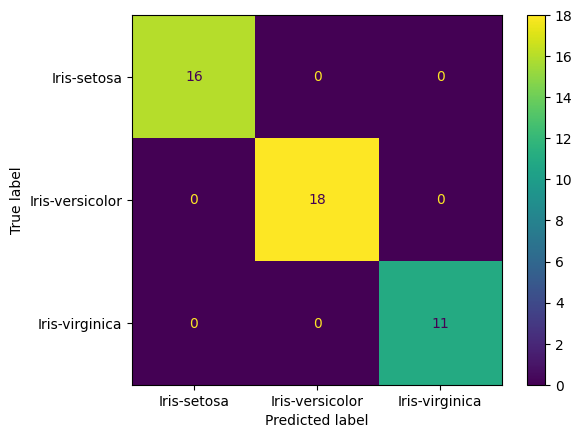

In [91]:
multi = MultinomialNB()
acc_multi = validacion(multi, X_train, y_train, 3)
print(f"Accuracy promedio: {acc_multi}\n")

gauss = GaussianNB()
acc_gauss = validacion(gauss, X_train, y_train, 3)
print(f"Accuracy promedio: {acc_gauss}\n")

mejor_modelo = best_accuracy((multi, gauss),(acc_multi, acc_gauss), X_train, y_train)
print(f"El mejor modelo: {mejor_modelo}")

prueba_final(mejor_modelo, X_test, y_test)

# Dataset Email

Clasifica correos como spam o no spam usando la frecuencia de palabras. Son 5,172 correos, tiene varias características (cada una es una palabra distina), sus valores son enteros. Hace una **clasificación binaria**. Está muy desbalanceado.

In [92]:
df = pd.read_csv("emails.csv")
X = df.drop(columns = ["Prediction", "Email No."])
y = df["Prediction"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 0, shuffle = True)


Fold: 1
Accuracy: 0.9453189726594863

Fold: 2
Accuracy: 0.9378624689312345

Fold: 3
Accuracy: 0.9469320066334992

Accuracy promedio: 0.9433711494080734

Fold: 1
Accuracy: 0.947804473902237

Fold: 2
Accuracy: 0.9428334714167357

Fold: 3
Accuracy: 0.9494195688225538

Accuracy promedio: 0.9466858380471755

El mejor modelo: GaussianNB()
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1111
           1       0.88      0.95      0.91       441

    accuracy                           0.95      1552
   macro avg       0.93      0.95      0.94      1552
weighted avg       0.95      0.95      0.95      1552

[[1054   57]
 [  23  418]]


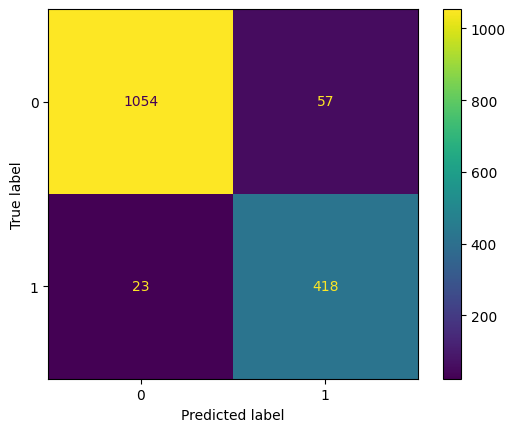

In [94]:
multi = MultinomialNB()
acc_multi = validacion(multi, X_train, y_train, 3)
print(f"Accuracy promedio: {acc_multi}\n")

gauss = GaussianNB()
acc_gauss = validacion(gauss, X_train, y_train, 3)
print(f"Accuracy promedio: {acc_gauss}\n")

mejor_modelo = best_accuracy((multi, gauss),(acc_multi, acc_gauss), X_train, y_train)
print(f"El mejor modelo: {mejor_modelo}")

prueba_final(mejor_modelo, X_test, y_test)